In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# Loading training data
X_train = pd.read_csv('../data/X_train.csv')
y_train = pd.read_csv('../data/y_train.csv').squeeze()  #conversion to Series

In [3]:
print("Shape:", X_train.shape)
print("Data types:\n", X_train.dtypes)

Shape: (5625, 30)
Data types:
 gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service       

In [4]:
# Add target to features temporarily for correlation
df_train = X_train.copy()
df_train['Churn'] = y_train

In [5]:
# Correlation matrix
corr_matrix = df_train.corr()

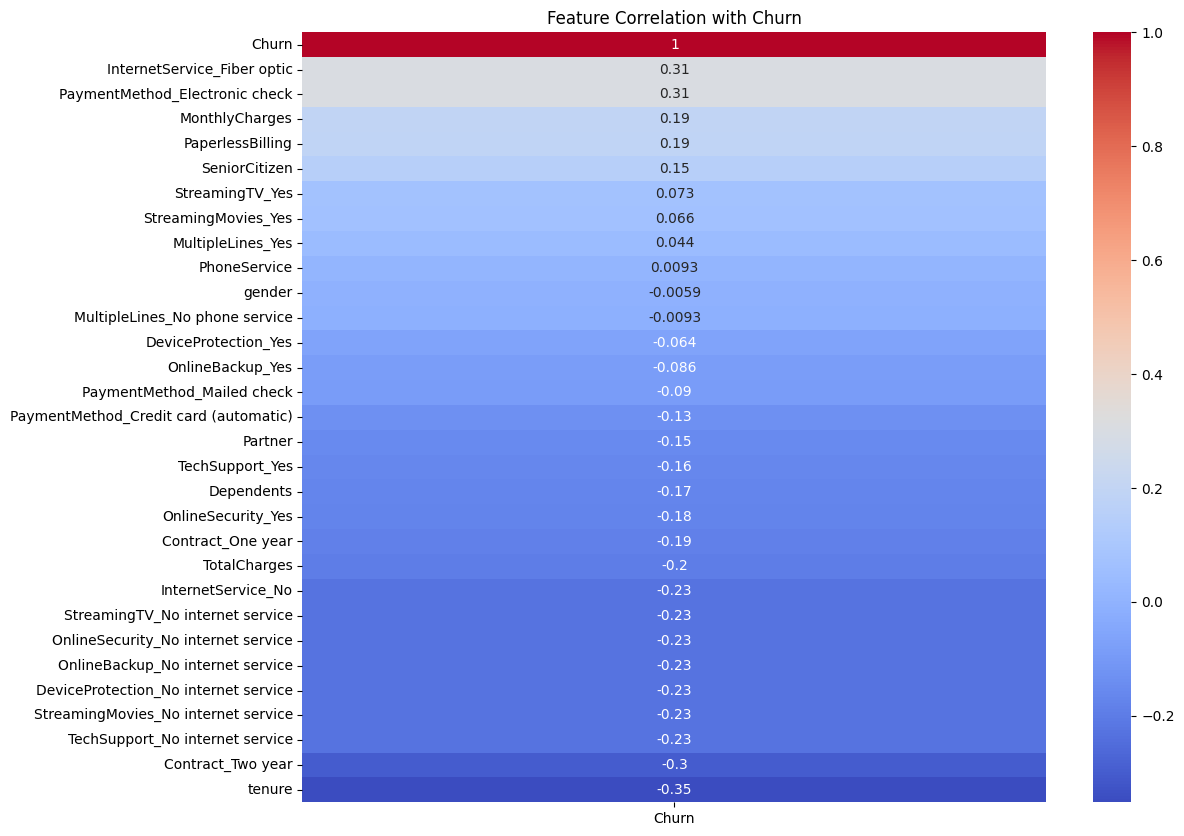

In [6]:
# Visualize correlation heatmap (focus on 'Churn')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 10 features
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x000002A7DBA29940>)

In [8]:
# Get scores and feature names
scores = selector.scores_
features = X_train.columns

In [9]:
# Create a dataframe for scores
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores.head(10))

                                 Feature          Score
8                           TotalCharges  495944.189641
4                                 tenure   12868.715415
7                         MonthlyCharges    2935.492680
26                     Contract_Two year     388.655168
28        PaymentMethod_Electronic check     346.643724
11           InternetService_Fiber optic     295.005561
17  DeviceProtection_No internet service     228.447173
19       TechSupport_No internet service     228.447173
23   StreamingMovies_No internet service     228.447173
21       StreamingTV_No internet service     228.447173


In [ ]:
#recursive feature elimination

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [13]:
# Logistic Regression model
model = LogisticRegression(max_iter=5000)

In [14]:
# RFE selecting top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=10)

In [16]:
# Check which features are selected
selected_features = X_train.columns[rfe.support_]

print("Selected Features by RFE:")
print(selected_features)

Selected Features by RFE:
Index(['PhoneService', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                           Feature  Importance
8                     TotalCharges    0.198838
4                           tenure    0.171546
7                   MonthlyCharges    0.168485
28  PaymentMethod_Electronic check    0.039660
11     InternetService_Fiber optic    0.035149
0                           gender    0.028965
26               Contract_Two year    0.026683
14              OnlineSecurity_Yes    0.026053
6                 PaperlessBilling    0.025548
20                 TechSupport_Yes    0.023722


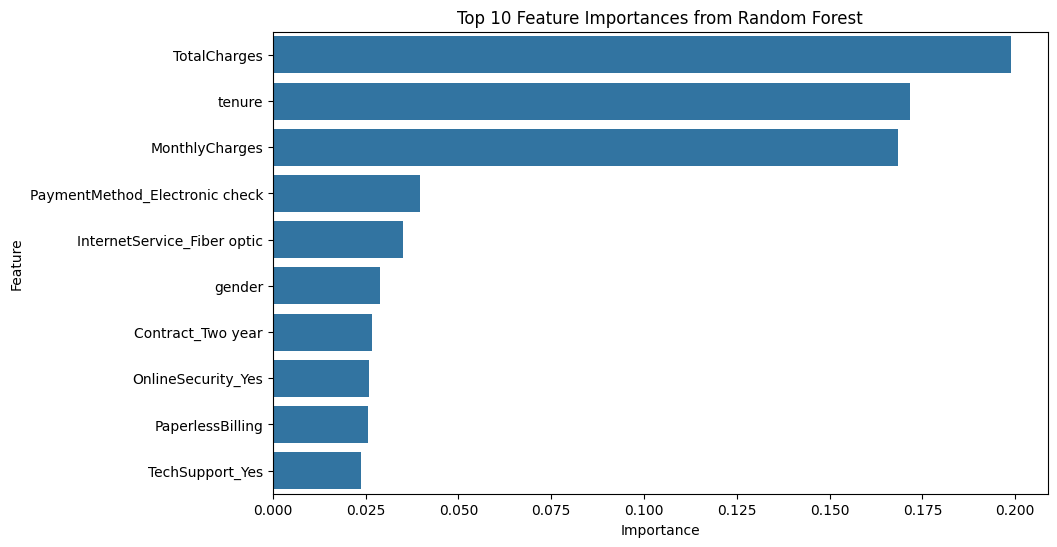

In [19]:
# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

In [20]:
# choose final features

In [21]:
final_features = list(selected_features)  # or your chosen features list
X_train_selected = X_train[final_features]
X_train_selected.to_csv('../data/X_train_selected.csv', index=False)
